## Job Satisfaction

This notebook explores job satisfaction according to the survey results.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

In [14]:
df = pd.read_csv('../dataset/survey_results/survey-results-public.csv')
schema = pd.read_csv('../dataset/survey_results/survey-results-schema.csv')
#df.head()

### Question Set 1
- 1.1. The proportion of missing values in the Job Satisfaction column?
- 1.2. According to EmploymentStatus, which group has the highest average job satisfaction?'
- 1.3. In general, do smaller companies appear to have employees with higher job satisfaction?

In [11]:
# 1.1 
df.JobSatisfaction.isnull().sum() / df.shape[0]

0.20149722542142184

In [17]:
# 1.2
# df.EmploymentStatus.value_counts()
df.groupby('EmploymentStatus').mean().JobSatisfaction.sort_values(ascending=False)

EmploymentStatus
Independent contractor, freelancer, or self-employed    7.252823
Not employed, and not looking for work                  7.000000
Employed full-time                                      6.926805
Employed part-time                                      6.821468
I prefer not to say                                          NaN
Not employed, but looking for work                           NaN
Retired                                                      NaN
Name: JobSatisfaction, dtype: float64

In [32]:
# 1.3
df.groupby('CompanySize').mean().JobSatisfaction.sort_values(ascending=False)

CompanySize
I prefer not to answer      7.284946
I don't know                7.054622
10 to 19 employees          7.035739
500 to 999 employees        7.029967
100 to 499 employees        7.029324
Fewer than 10 employees     7.025719
20 to 99 employees          6.997039
1,000 to 4,999 employees    6.908506
5,000 to 9,999 employees    6.832155
10,000 or more employees    6.793617
Name: JobSatisfaction, dtype: float64

#### Overview - Question Set 1

20% of the total dataset misses Job Satisfaction, account for the survey participants who are not employed, retired or prefer not to answer the question. It is contractors/self-employed groups that have the highest job satisfcation among different groups of employement status. It may not be largely noticeable, but there is a trend that explains that job satisfaction is more likely higher when working in smaller-scale companies.

---
### Question Set 2

#### 2.1. Do individuals who program outside of work appear to have higher JobSatisfaction?

In [24]:
df.ProgramHobby.value_counts()

Yes, I program as a hobby                    24801
Yes, both                                    13756
No                                            9787
Yes, I contribute to open source projects     3048
Name: ProgramHobby, dtype: int64

In [20]:
# Seperate into two groups : program outside work vs as work
program_outside_work = df.query('ProgramHobby != "No"')
program_as_work = df.query('ProgramHobby == "No"')
program_outside_work.shape[0] + program_as_work.shape[0] == df.shape[0]

True

In [21]:
# Job Satisfaction
program_outside_work_js = program_outside_work.JobSatisfaction.dropna()
program_as_work_js = program_as_work.JobSatisfaction.dropna()

In [23]:
program_outside_work_js.describe()[:3], program_as_work_js.describe()[:3]

(count    31897.000000
 mean         6.989842
 std          2.166932
 Name: JobSatisfaction, dtype: float64,
 count    8479.000000
 mean        6.833825
 std         2.166050
 Name: JobSatisfaction, dtype: float64)

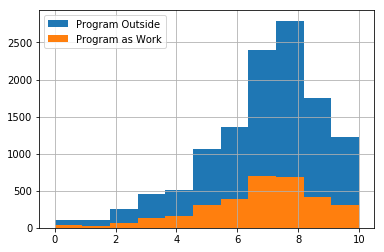

In [66]:
program_outside_work_js.hist(bins=11, label='Program Outside')
program_as_work_js.hist(bins=11, label='Program as Work')
plt.legend()

It looks that those who program outside work has higher satisfaction than those who program as work on average. Let's see if this finding is statistically significant using t-test.

In [64]:
tstats, pvalue = stats.ttest_ind(program_as_work_js, program_outside_work_js, equal_var=False, nan_policy='raise')
tstats, pvalue

(-3.7496535880002826, 0.00017906957710036751)

Assuming 95% confidence, where alpha = 0.05, the p-value result 0.00179 < alpha. P_value might be controversial but gives a quick look that confirms the earlier finding : people who program outside work has a higher average job satisfaction than people who program at work.

#### 2.2. Does flexibility to work outside of the office appear to have an influence on JobSatisfaction?'

In [72]:
df.groupby('HomeRemote').mean().JobSatisfaction.sort_values(ascending=False)#.plot(kind='bar')

HomeRemote
All or almost all the time (I'm full-time remote)          7.405421
Less than half the time, but at least one day each week    7.143786
About half the time                                        7.125737
A few days each month                                      7.096694
More than half, but not all, the time                      6.973684
It's complicated                                           6.942053
Never                                                      6.697127
Name: JobSatisfaction, dtype: float64

Overall, given the dataset it is more likely that working remotely gives more job satisafction than the counterpart (working in the office).

#### 2.3. A friend says a Doctoral degree increases the chance of having job you like, does this seem true?

In [79]:
df.groupby('FormalEducation').mean().JobSatisfaction.sort_values()

FormalEducation
Bachelor's degree                                                    6.900293
Primary/elementary school                                            6.946237
Master's degree                                                      6.977356
I never completed any formal education                               7.000000
Professional degree                                                  7.075893
Some college/university study without earning a bachelor's degree    7.151268
I prefer not to answer                                               7.211679
Secondary school                                                     7.219512
Doctoral degree                                                      7.438492
Name: JobSatisfaction, dtype: float64

In [80]:
doctoral_yes = df.query('FormalEducation == "Doctoral degree"')
doctoral_no = df.query('FormalEducation != "Doctoral degree"')
doctoral_yes.shape[0] + doctoral_no.shape[0] == df.shape[0]

True

In [84]:
doctoral_yes_js = doctoral_yes.JobSatisfaction.dropna()
doctoral_no_js = doctoral_no.JobSatisfaction.dropna()

In [86]:
# T-test to validate the result
stats.ttest_ind(doctoral_yes_js, doctoral_no_js, equal_var=False, nan_policy='raise')

Ttest_indResult(statistic=5.2455431457257333, pvalue=2.2306780188060128e-07)

The respondents with doctoral degree appear to be more satisfied at work (7.44) than those without.

Given the p-value of 0.00000022306 > alpha (0.05), it suggests that the difference in job satisfaction between doctoral and non-doctoral degree holders is satistically significant (doctoral vs non-doctoral).